# Estimating Firing Rates

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spike_times = np.loadtxt('ExampleSpikeTimes1.dat')
spike_times[:10]

array([ 38. ,  43.6,  51. ,  56.4,  62.6,  65.8,  68.6,  71. ,  76.6,  89. ])

#### 1. Construct spike histograms

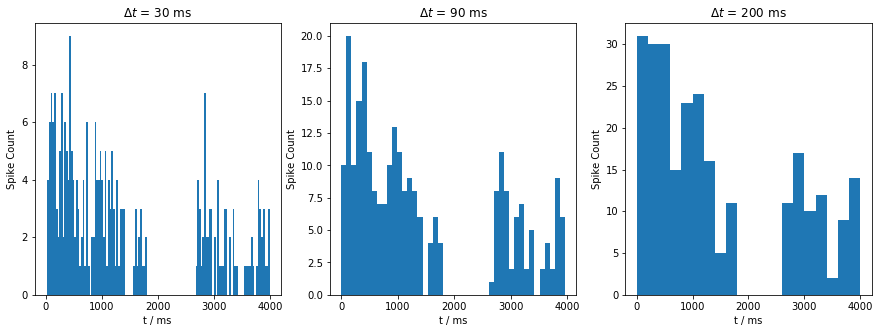

In [3]:
dts = [30, 90, 200]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, dt in zip(axes, dts):
    plt.sca(ax)
    plt.hist(spike_times, np.arange(0, 4001, dt))
    plt.xlabel('t / ms')
    plt.ylabel('Spike Count')
    plt.title('$\Delta t$ = {} ms'.format(dt))

The firing rates are the spike counts (vertical axis) divided by $\Delta t$.

#### 2. Response function

In [4]:
sliding_window_function = lambda tau, dt: 1 / dt if tau >= -dt/2 and tau < dt/2 else 0
gaussian_window_function = lambda tau, sigma_w: 1 / (np.sqrt(2 * np.pi) * sigma_w) * np.exp(- tau**2 / (2 * sigma_w**2))
alpha_function = lambda tau, inverse_alpha: max(0, (1 / inverse_alpha)**2 * tau * np.exp(- 1 / inverse_alpha * tau))

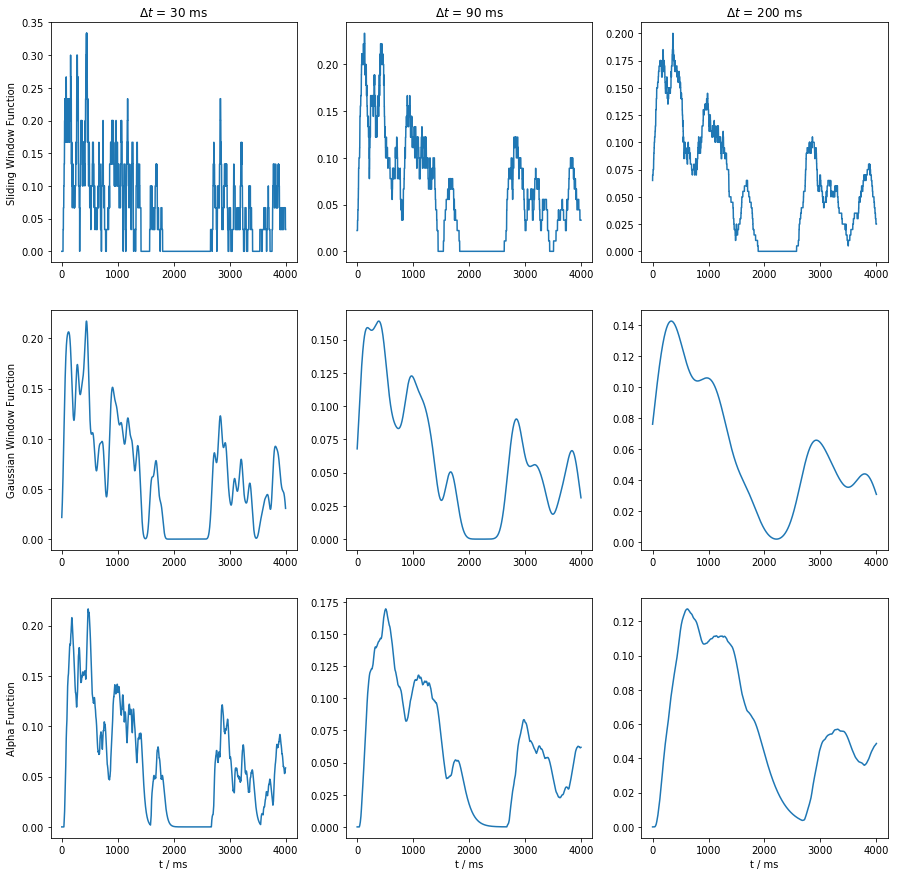

In [5]:
dts = [30, 90, 200]
response_functions = [sliding_window_function, gaussian_window_function, alpha_function]
response_function_names = ['Sliding Window Function', 'Gaussian Window Function', 'Alpha Function']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, (horizontal_axes, response_function, response_function_name) in enumerate(zip(axes, response_functions, response_function_names)):
    for j, (ax, dt) in enumerate(zip(horizontal_axes, dts)):
        
        response = np.zeros(4001)
        for t in range(len(response)):
            # Compute the response function for time t by summing over all spike times.
            for spike_time in spike_times:
                response[t] += response_function(t - spike_time, dt)
                
        plt.sca(ax)
        plt.plot(response)
        
        if i == 0:
            plt.title('$\Delta t$ = {} ms'.format(dt))
            
        if i == len(horizontal_axes) - 1:
            plt.xlabel('t / ms')
            
        if j == 0:
            plt.ylabel(response_function_name)

#### 3. Calculate the spike count rate

In [7]:
r = len(spike_times) / 4000  # in 1 / ms
r

0.065